<a href="https://colab.research.google.com/github/KenNgan776/PythonNotebook/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [93]:
data = pd.read_csv('gila_river.csv')

In [94]:
data.head()

,y(t-1),y(t-2),y(t-3),y(t)
0,0.0,0.0,0.0,32.0
1,32.0,0.0,0.0,27.0
2,27.0,32.0,0.0,27.0
3,27.0,27.0,32.0,25.0
4,25.0,27.0,27.0,27.0


In [95]:
data.shape

(1034, 4)

In [96]:
X = data.drop(columns=['y(t)'])
y = data['y(t)']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
mlp=MLPRegressor(hidden_layer_sizes=(64,64),max_iter=3000)

In [100]:
mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=3000)

In [101]:
y_train_pred=mlp.predict(X_train)
y_test_pred=mlp.predict(X_test)

In [102]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)

In [103]:
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

Training MSE: 62160.65994173068
Testing MSE: 23646.48681837143


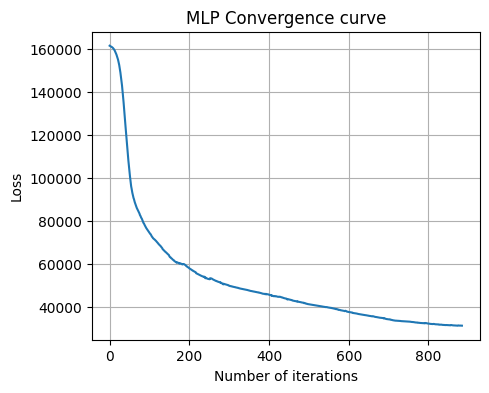

In [104]:
plt.figure(figsize=(5, 4))
plt.plot(mlp.loss_curve_)
plt.title('MLP Convergence curve')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

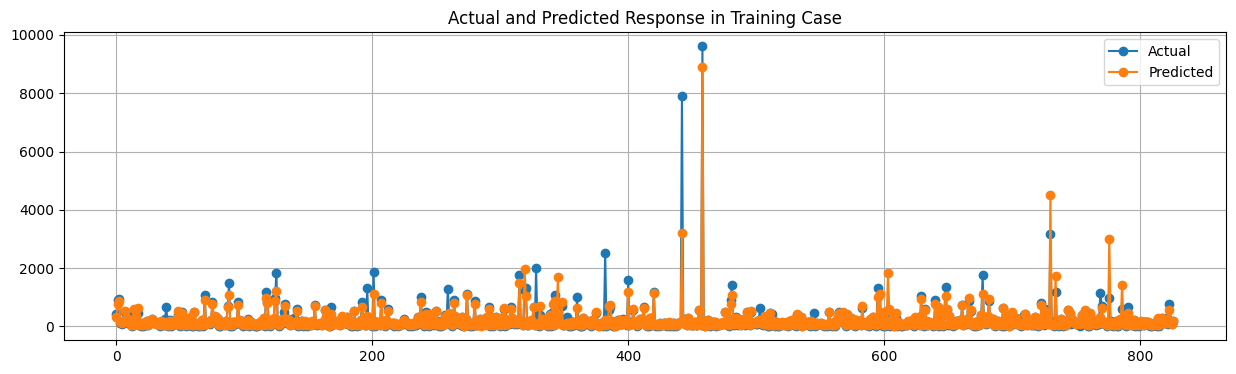

In [105]:
t=range(len(y_train))

plt.figure(figsize=(15, 4))
plt.plot(t, y_train, label='Actual', linestyle='-', marker='o')
plt.plot(t, y_train_pred, label='Predicted', linestyle='-', marker='o')
plt.title('Actual and Predicted Response in Training Case')
plt.legend()
plt.grid(True)

plt.show()

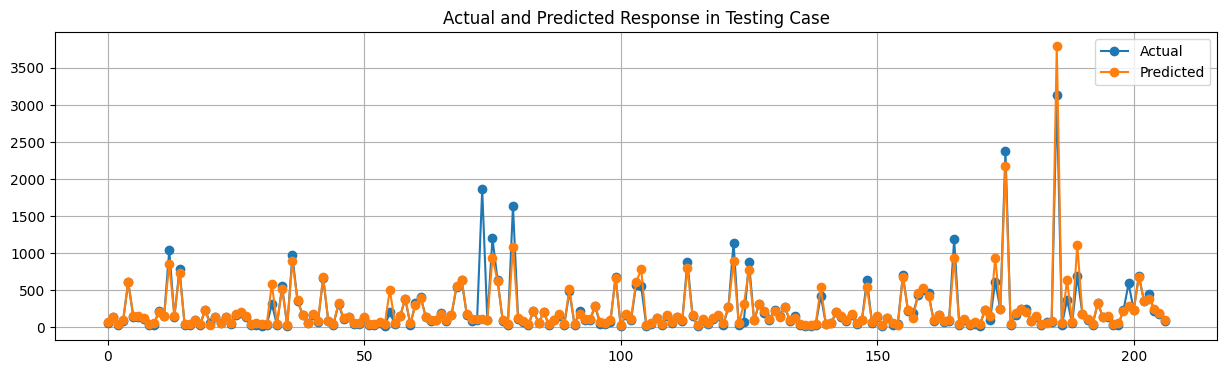

In [108]:
t=range(len(y_test))

plt.figure(figsize=(15, 4))
plt.plot(t, y_test, label='Actual', linestyle='-', marker='o')
plt.plot(t, y_test_pred, label='Predicted', linestyle='-', marker='o')
plt.title('Actual and Predicted Response in Testing Case')
plt.legend()
plt.grid(True)

plt.show()

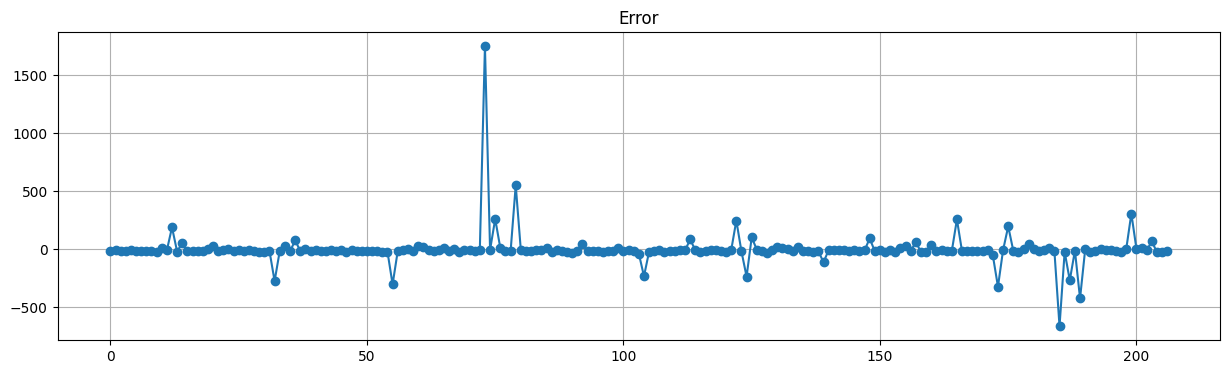

In [109]:
t=range(len(y_test))

plt.figure(figsize=(15, 4))
plt.plot(t, y_test-y_test_pred, linestyle='-', marker='o')
plt.title('Error')
#plt.legend()
plt.grid(True)

plt.show()